# IOE 511 / MATH 562 Optimization Project

## Experiment Runner and Visualization


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import os

import problems
import solver

print("Modules imported.")

Modules imported.


In [25]:
import numpy as np
import time
import algorithms  # Assuming this is your algorithms.py file
import problems  # Assuming this is your problems.py file
from solver import optSolver_WHY # Assuming this is in solver.py

def tune_hyperparameters(problem, method, param_grid, num_trials=5, verbose=False):
    """
    Tunes hyperparameters for a given optimization method on a given problem.

    Args:
        problem (dict): The optimization problem definition.
        method (dict): The method specification (name).
        param_grid (dict): A dictionary of hyperparameters to tune,
            where keys are hyperparameter names and values are lists of
            possible values.
        num_trials (int, optional): The number of trials for each
            hyperparameter combination. Defaults to 5.
        verbose (bool, optional): Whether to print detailed progress.
            Defaults to False.

    Returns:
        dict: A dictionary containing the best hyperparameters found,
            the corresponding best result, and all trial results.
    """
    best_params = None
    best_result = None
    all_results = []

    # Generate all combinations of hyperparameters
    param_names = list(param_grid.keys())
    param_values = list(param_grid.values())
    num_combinations = np.prod([len(v) for v in param_values])
    print(f"Total hyperparameter combinations to test: {num_combinations}")

    combinations = np.array(np.meshgrid(*param_values)).T.reshape(-1, len(param_names))

    for i, combination in enumerate(combinations):
        params = dict(zip(param_names, combination))
        if verbose:
            print(f"\n--- Tuning Trial {i + 1}/{num_combinations} ---")
            print(f"Testing parameters: {params}")

        trial_results = []
        for j in range(num_trials):
            if verbose:
                print(f"  Trial {j + 1}/{num_trials}: Running optimization...")
            start_time = time.time()
            x, f_val, info = optSolver_WHY(problem, method, params)
            end_time = time.time()
            trial_time = end_time - start_time

            result = {
                'trial': j + 1,
                'x': x,
                'f_val': f_val,
                'iterations': info['iterations'],
                'time': trial_time,
                'success': info['success'],
                'params': params,  # Include params in each trial result
            }
            trial_results.append(result)

        # Average results across trials for this parameter combination
        avg_f_val = np.mean([r['f_val'] for r in trial_results])
        avg_iterations = np.mean([r['iterations'] for r in trial_results])
        avg_time = np.mean([r['time'] for r in trial_results])
        success_rate = np.mean([r['success'] for r in trial_results])

        # Consider using a weighted combination of metrics
        # For example, prioritize success, then f_val, then time
        composite_score = (success_rate * 1000) - avg_f_val + (100 / avg_time)

        if best_result is None or composite_score > best_result['composite_score']:
            best_result = {
                'avg_f_val': avg_f_val,
                'avg_iterations': avg_iterations,
                'avg_time': avg_time,
                'success_rate': success_rate,
                'params': params,
                'composite_score': composite_score, # Store the score
            }
            best_params = params

        all_results.append({
            'params': params,
            'trial_results': trial_results,
            'avg_f_val': avg_f_val,
            'avg_iterations': avg_iterations,
            'avg_time': avg_time,
            'success_rate': success_rate
        })

        if verbose:
            print("  Average Results:")
            print(f"    Avg f(x): {avg_f_val:.4e}")
            print(f"    Avg Iterations: {avg_iterations:.2f}")
            print(f"    Avg Time: {avg_time:.4f} seconds")
            print(f"    Success Rate: {success_rate:.2%}")
            print("Best Result So Far:")
            print(f"    Best Params: {best_params}")
            print(f"    Avg f(x): {best_result['avg_f_val']:.4e}")
            print(f"    Avg Iterations: {best_result['avg_iterations']:.2f}")
            print(f"     Avg Time: {best_result['avg_time']:.4f}")
            print(f"    Success Rate: {best_result['success_rate']:.2%}")

    print("\n--- Hyperparameter Tuning Complete ---")
    print("Best Hyperparameters:")
    print(best_params)
    print("Best Results:")
    print(f"  Avg f(x): {best_result['avg_f_val']:.4e}")
    print(f"  Avg Iterations: {best_result['avg_iterations']:.2f}")
    print(f"  Avg Time: {best_result['avg_time']:.4f} seconds")
    print(f"  Success Rate: {best_result['success_rate']:.2%}")

    return {
        'best_params': best_params,
        'best_result': best_result,
        'all_results': all_results,
    }

if __name__ == '__main__':
    # Example usage:
    problem_name = 'quad_10_10'  # Or any problem from your problems.py
    problem = problems.get_problem(problem_name).to_dict()
    method = {'name': 'GradientDescent'}  # Or any method from your algorithms.py

    # Define the hyperparameter grid to search
    param_grid = {
        'alpha_init': [0.1, 1.0, 10.0],  # Initial step size
        'c1_ls': [1e-4, 1e-3, 1e-2],    # Armijo condition parameter
        'c': [0.1, 0.5, 0.9],          # Step size reduction factor
        'term_tol': [1e-6, 1e-8],
        'max_iterations': [100, 1000]
    }

    # Run the hyperparameter tuning
    tuning_results = tune_hyperparameters(problem, method, param_grid, num_trials=3, verbose=True)

    # Print the best hyperparameters and results
    print("\nBest Hyperparameters:")
    print(tuning_results['best_params'])
    print("\nBest Results:")
    print(tuning_results['best_result'])

Total hyperparameter combinations to test: 108

--- Tuning Trial 1/108 ---
Testing parameters: {'alpha_init': np.float64(0.1), 'c1_ls': np.float64(0.0001), 'c': np.float64(0.1), 'term_tol': np.float64(1e-06), 'max_iterations': np.float64(100.0)}
  Trial 1/3: Running optimization...
  Trial 2/3: Running optimization...
  Trial 3/3: Running optimization...
  Average Results:
    Avg f(x): -2.4066e+01
    Avg Iterations: 100.00
    Avg Time: 0.0012 seconds
    Success Rate: 0.00%
Best Result So Far:
    Best Params: {'alpha_init': np.float64(0.1), 'c1_ls': np.float64(0.0001), 'c': np.float64(0.1), 'term_tol': np.float64(1e-06), 'max_iterations': np.float64(100.0)}
    Avg f(x): -2.4066e+01
    Avg Iterations: 100.00
     Avg Time: 0.0012
    Success Rate: 0.00%

--- Tuning Trial 2/108 ---
Testing parameters: {'alpha_init': np.float64(0.1), 'c1_ls': np.float64(0.001), 'c': np.float64(0.1), 'term_tol': np.float64(1e-06), 'max_iterations': np.float64(100.0)}
  Trial 1/3: Running optimization

## 1. Define Problems and Methods

Define the set of problems and optimization methods to compare.

In [ ]:
# List of problem names to test
problem_names = [
    'quad_10_10',
    'quad_10_1000',
    'quad_1000_10',
    'quad_1000_1000',
    'quartic_1',           
    'quartic_2',            
    'Rosenbrock_2',       
    'Rosenbrock_100',      
    'DataFit_2',            
    'Exponential_10',       
    'Exponential_1000',     #
    'Exponential_100',      
    'Genhumps_5',           
    'Powell',               
    'IllConditioned_10_6'   
]

# Load problems
# Note: Ensure .mat files for quadratic problems are accessible (e.g., in the same directory)
test_problems = []
missing_files = False
for name in problem_names:
    try:
        # The get_problem function handles loading .mat files internally now
        problem_obj = problems.get_problem(name)
        test_problems.append(problem_obj.to_dict()) # Convert to dict for solver
    except FileNotFoundError as e:
        print(f"Warning: Could not load problem '{name}'. {e}. Skipping.")
        missing_files = True
    except Exception as e:
        print(f"Warning: Error loading problem '{name}': {e}. Skipping.")
        missing_files = True

if missing_files:
    print("\nEnsure the .mat files for quadratic problems are in the correct directory.")

# List of methods to test (using names expected by solver.py)
method_specs = [
    {'name': 'GradientDescent'},     # Backtracking 
    {'name': 'GradientDescentW'},    # Wolfe
    {'name': 'Newton'},              # Backtracking 
    {'name': 'NewtonW'},             # Wolfe 
    {'name': 'BFGS'},                # Backtracking 
    {'name': 'BFGSW'},               # Wolfe 
    {'name': 'DFP'},                 # Backtracking 
    {'name': 'DFPW'},                # Wolfe
    {'name': 'TRNewtonCG'},          # Trust Region Newton CG 
    {'name': 'TRSR1CG'},             # Trust Region SR1 CG 
    # L-BFGS Variants - Add memory size and strategy 
    {'name': 'LBFGS-M5-FIFO'},
    {'name': 'LBFGS-M5-MIN_CURV'},
    {'name': 'LBFGS-M5-ADAPTIVE'},
    {'name': 'LBFGS-M10-FIFO'},
    {'name': 'LBFGS-M10-MIN_CURV'},
    {'name': 'LBFGS-M10-ADAPTIVE'}
]

print(f"Loaded {len(test_problems)} problems.")
print(f"Defined {len(method_specs)} methods.")

Loaded 10 problems.
Defined 16 methods.


## 2. Define Options and Run Experiments

Set common optimization options and run the solver for each problem-method pair.

In [27]:
# Define common options
options = {
    # Regular trust region parameters
    'delta_init': 1.0,           # Initial trust region size
    'c1_tr': 0.5,                # TR contraction factor (higher = more conservative)
    'c2_tr': 1.5,                # TR expansion factor (lower = more conservative)
    
    # New parameters to control oscillation
    'delta_dampening': 0.8,      # Controls smoothness of TR changes (0.5-0.9)
    'sr1_reg_init': 1e-6,        # Initial regularization
    'sr1_reg_update': 1.2,       # How quickly regularization increases
    'strict_acceptance': True,    # Use stricter step acceptance
    'adaptive_tr': True,         # Enable adaptive trust region
}

# Store results
results = {}
detailed_info = {} # Store the full info dict for analysis

for problem in test_problems:
    problem_name = problem['name']
    print(f"\n--- Solving Problem: {problem_name} ---")
    results[problem_name] = {}
    detailed_info[problem_name] = {}
    
    for method in method_specs:
        method_name = method['name']
        print(f"  Using Method: {method_name}...")
        
        # Make a deep copy of options to avoid modification across runs if needed
        current_options = options.copy()
        
        # Make a copy of the problem dict to potentially reset x0 if necessary
        problem_instance = problem.copy()
        problem_instance['x0'] = problem['x0'].copy() # Ensure x0 is reset
        
        start_run_time = time.time()
        try:
            import copy
            # import time # Already imported at the top

            # --- Prepare arguments for solver.optSolver_WHY ---
            # 1. Method dictionary (containing the name)
            method_dict = {'name': method_name} # Uses method_name from the inner loop

            # 2. Options dictionary (Use the 'options' defined earlier in this cell)
            #    Make a deep copy to ensure options aren't changed between runs
            current_options = copy.deepcopy(options)
            # No method_options to update with based on Cell 4 definition

            # 3. Problem instance dictionary (already available as problem_instance)
            #    Ensuring x0 reset is already handled before the try block

            x_final, f_final, info = solver.optSolver_WHY(problem_instance, method_dict, current_options)

            end_run_time = time.time()
            run_time = end_run_time - start_run_time

            # --- Store Summary Results (for table) ---
            results[problem_name][method_name] = {
                'Iterations': info['iterations'],
                'Final f(x)': f_final,
                'Final ||∇f(x)||': info['grad_norms'][-1] if info.get('grad_norms') else 'N/A',
                'CPU Time (s)': run_time,
                'Success': info['success'],
                'Termination': info['termination_reason']
            }
            # Store full info for plotting
            detailed_info[problem_name][method_name] = info
            print(f"  Finished in {run_time:.4f} s, Iterations: {info['iterations']}, Success: {info['success']}")

        except Exception as e:
            # Capture runtime even on failure if possible before the error
            end_run_time = time.time()
            run_time = end_run_time - start_run_time
            print(f"  Failed: {e}") # Original error gets printed here

            # --- Store Failure Results ---
            results[problem_name][method_name] = {
                'Iterations': 'Error',
                'Final f(x)': 'Error',
                'Final ||∇f(x)||': 'Error',
                'CPU Time (s)': run_time, # Record time until failure
                'Success': False,
                'Termination': f'Failed with {type(e).__name__}'
            }
            detailed_info[problem_name][method_name] = {'termination_reason': str(e), 'success': False}

            



--- Solving Problem: quad_10_10 ---
  Using Method: GradientDescent...
  Finished in 0.0020 s, Iterations: 120, Success: True
  Using Method: GradientDescentW...
  Finished in 0.0020 s, Iterations: 120, Success: True
  Using Method: Newton...
  Finished in 0.0005 s, Iterations: 1, Success: True
  Using Method: NewtonW...
  Finished in 0.0000 s, Iterations: 1, Success: True
  Using Method: BFGS...
  Finished in 0.0020 s, Iterations: 27, Success: True
  Using Method: BFGSW...
  Finished in 0.0010 s, Iterations: 27, Success: True
  Using Method: DFP...
  Finished in 0.0010 s, Iterations: 42, Success: True
  Using Method: DFPW...
  Finished in 0.0010 s, Iterations: 42, Success: True
  Using Method: TRNewtonCG...
  Finished in 0.0470 s, Iterations: 1000, Success: False
  Using Method: TRSR1CG...
  Finished in 0.0641 s, Iterations: 1000, Success: False
  Using Method: LBFGS-M5-FIFO...
  Finished in 0.0010 s, Iterations: 22, Success: True
  Using Method: LBFGS-M5-MIN_CURV...
  Finished in 0.

## 3. Results Summary Table

Display the summary results in a table as requested.

In [28]:
# --- Create Summary Table --- 
summary_data = []
method_names_list = [m['name'] for m in method_specs]

for prob_name in results:
    for meth_name in method_names_list:
        if meth_name in results[prob_name]:
            res = results[prob_name][meth_name]
            # Format results for display
            iter_disp = res['Iterations']
            f_disp = f"{res['Final f(x)']:.4e}" if isinstance(res['Final f(x)'], (int, float)) else 'Fail'
            norm_disp = f"{res['Final ||∇f(x)||']:.4e}" if isinstance(res['Final ||∇f(x)||'], (int, float)) else 'Fail'
            time_disp = f"{res['CPU Time (s)']:.4f}" if isinstance(res['CPU Time (s)'], (int, float)) else 'Fail'
            success_disp = 'Yes' if res['Success'] else 'No'
            
            summary_data.append({
                'Problem': prob_name,
                'Method': meth_name,
                'Iterations': iter_disp,
                'Final f(x)': f_disp,
                'Final ||∇f(x)||': norm_disp,
                'CPU Time (s)': time_disp,
                'Success': success_disp
            })
        else:
             # Handle cases where a method might not have results for a problem
             summary_data.append({
                'Problem': prob_name,
                'Method': meth_name,
                'Iterations': 'N/A',
                'Final f(x)': 'N/A',
                'Final ||∇f(x)||': 'N/A',
                'CPU Time (s)': 'N/A',
                'Success': 'N/A'
            })

# Create DataFrame for better display
# Ensure display is imported if running outside a standard Jupyter environment
try:
    from IPython.display import display
except ImportError:
    display = print # Fallback to print if display is not available
summary_df = pd.DataFrame(summary_data)
summary_df.set_index(['Problem', 'Method'], inplace=True)

# Display the table
print("--- Summary of Results ---")
display(summary_df)

--- Summary of Results ---


Iterations   Final f(x)  \
Problem             Method                                        
quad_10_10          GradientDescent            120  -2.4709e+01   
                    GradientDescentW           120  -2.4709e+01   
                    Newton                       1  -2.4709e+01   
                    NewtonW                      1  -2.4709e+01   
                    BFGS                        27  -2.4709e+01   
...                                            ...          ...   
IllConditioned_10_6 LBFGS-M5-MIN_CURV         1000  -2.4648e-03   
                    LBFGS-M5-ADAPTIVE         1000  -3.1339e-01   
                    LBFGS-M10-FIFO            1000  -3.2325e-01   
                    LBFGS-M10-MIN_CURV        1000  -3.2323e-01   
                    LBFGS-M10-ADAPTIVE        1000  -3.2325e-01   

                                       Final ||∇f(x)|| CPU Time (s) Success  
Problem             Method                                                   
quad_10_10          GradientDescent         9.0912e-07       0.0020     Yes  
                    GradientDescentW        9.0912e-07       0.0020     Yes  
                    Newton                  2.8475e-16       0.0005     Yes  
                    NewtonW                 2.8475e-16       0.0000     Yes  
                    BFGS                    3.2647e-07       0.0020     Yes  
...                                                ...          ...     ...  
IllConditioned_10_6 LBFGS-M5-MIN_CURV       6.1758e+00       0.0320      No  
                    LBFGS-M5-ADAPTIVE       1.9368e+01       0.0380      No  
                    LBFGS-M10-FIFO          6.4948e-04       0.4760      No  
                    LBFGS-M10-MIN_CURV      2.7481e-02       0.0901      No  
                    LBFGS-M10-ADAPTIVE      1.6351e-03       0.2217      No  

[160 rows x 5 columns]

In [38]:
print("\nUnique values in Problem level:", summary_df.index.get_level_values('Problem').unique())
print("\nUnique values in Method level:", summary_df.index.get_level_values('Method').unique())


Unique values in Problem level: Index(['quad_10_10', 'quad_10_1000', 'quad_1000_10', 'quad_1000_1000',
       'quartic_1', 'quartic_2', 'Rosenbrock', 'Powell', 'genhumps_5',
       'IllConditioned_10_6'],
      dtype='object', name='Problem')

Unique values in Method level: Index(['GradientDescent', 'GradientDescentW', 'Newton', 'NewtonW', 'BFGS',
       'BFGSW', 'DFP', 'DFPW', 'TRNewtonCG', 'TRSR1CG', 'LBFGS-M5-FIFO',
       'LBFGS-M5-MIN_CURV', 'LBFGS-M5-ADAPTIVE', 'LBFGS-M10-FIFO',
       'LBFGS-M10-MIN_CURV', 'LBFGS-M10-ADAPTIVE'],
      dtype='object', name='Method')


In [39]:
summary_df.loc['quad_10_10']

Iterations   Final f(x) Final ||∇f(x)|| CPU Time (s)  \
Method                                                                     
GradientDescent            120  -2.4709e+01      9.0912e-07       0.0020   
GradientDescentW           120  -2.4709e+01      9.0912e-07       0.0020   
Newton                       1  -2.4709e+01      2.8475e-16       0.0005   
NewtonW                      1  -2.4709e+01      2.8475e-16       0.0000   
BFGS                        27  -2.4709e+01      3.2647e-07       0.0020   
BFGSW                       27  -2.4709e+01      3.2647e-07       0.0010   
DFP                         42  -2.4709e+01      8.7407e-07       0.0010   
DFPW                        42  -2.4709e+01      8.7407e-07       0.0010   
TRNewtonCG                1000  -2.4626e+01      2.0577e-01       0.0470   
TRSR1CG                   1000  -2.4676e+01      1.3964e-01       0.0641   
LBFGS-M5-FIFO               22  -2.4709e+01      9.9657e-07       0.0010   
LBFGS-M5-MIN_CURV           26  -2.4709e+01      9.6510e-07       0.0005   
LBFGS-M5-ADAPTIVE           28  -2.4709e+01      9.9194e-07       0.0015   
LBFGS-M10-FIFO              19  -2.4709e+01      4.9041e-07       0.0005   
LBFGS-M10-MIN_CURV          19  -2.4709e+01      5.0890e-07       0.0010   
LBFGS-M10-ADAPTIVE          20  -2.4709e+01      8.3218e-07       0.0005   

                   Success  
Method                      
GradientDescent        Yes  
GradientDescentW       Yes  
Newton                 Yes  
NewtonW                Yes  
BFGS                   Yes  
BFGSW                  Yes  
DFP                    Yes  
DFPW                   Yes  
TRNewtonCG              No  
TRSR1CG                 No  
LBFGS-M5-FIFO          Yes  
LBFGS-M5-MIN_CURV      Yes  
LBFGS-M5-ADAPTIVE      Yes  
LBFGS-M10-FIFO         Yes  
LBFGS-M10-MIN_CURV     Yes  
LBFGS-M10-ADAPTIVE     Yes

In [30]:
summary_df.loc['genhumps_5']

Iterations  Final f(x) Final ||∇f(x)|| CPU Time (s)  \
Method                                                                    
GradientDescent            214  4.3429e-12      9.3198e-07       0.0065   
GradientDescentW           230  4.4389e-12      9.4222e-07       0.0100   
Newton                      69  3.2987e-19      2.6501e-10       0.0435   
NewtonW                   1000  1.0249e+05      1.9207e+02       1.3488   
BFGS                        44  3.5374e-14      1.1564e-07       0.0025   
BFGSW                       90  1.3076e-13      1.8046e-07       0.0070   
DFP                       1000  3.4521e+00      1.7700e+00       0.0416   
DFPW                      1000  8.4563e-01      6.7875e-01       0.0420   
TRNewtonCG                 237  4.4226e-12      9.4053e-07       0.1161   
TRSR1CG                    393  7.0307e-14      1.1859e-07       0.0280   
LBFGS-M5-FIFO               57  5.6932e-13      4.7478e-07       0.0045   
LBFGS-M5-MIN_CURV           67  3.2320e-12      8.5552e-07       0.0055   
LBFGS-M5-ADAPTIVE           62  3.4112e-14      1.1572e-07       0.0055   
LBFGS-M10-FIFO              79  8.3319e-13      5.5203e-07       0.0060   
LBFGS-M10-MIN_CURV         118  2.4730e-12      9.6479e-07       0.0170   
LBFGS-M10-ADAPTIVE          62  1.5451e-12      7.4272e-07       0.0080   

                   Success  
Method                      
GradientDescent        Yes  
GradientDescentW       Yes  
Newton                 Yes  
NewtonW                 No  
BFGS                   Yes  
BFGSW                  Yes  
DFP                     No  
DFPW                    No  
TRNewtonCG             Yes  
TRSR1CG                Yes  
LBFGS-M5-FIFO          Yes  
LBFGS-M5-MIN_CURV      Yes  
LBFGS-M5-ADAPTIVE      Yes  
LBFGS-M10-FIFO         Yes  
LBFGS-M10-MIN_CURV     Yes  
LBFGS-M10-ADAPTIVE     Yes

In [31]:
summary_df.loc['Powell']

Iterations  Final f(x) Final ||∇f(x)|| CPU Time (s)  \
Method                                                                    
GradientDescent           1000  1.7476e-04      8.4543e-03       0.0220   
GradientDescentW          1000  1.7477e-04      8.5847e-03       0.0435   
Newton                      17  1.7086e-10      4.7326e-07       0.0025   
NewtonW                     17  1.7086e-10      4.7326e-07       0.0015   
BFGS                        29  3.2599e-10      6.5961e-07       0.0020   
BFGSW                     1000  2.2902e-09      4.4042e-06       0.4860   
DFP                         83  3.8919e-14      2.5231e-08       0.0030   
DFPW                       360  2.5920e-12      8.9960e-07       0.1832   
TRNewtonCG                1000  1.8160e+00      1.0535e+01       0.1241   
TRSR1CG                    175  1.2184e-10      1.5168e-07       0.0100   
LBFGS-M5-FIFO             1000  3.8412e-08      2.1397e-05       0.4840   
LBFGS-M5-MIN_CURV         1000  2.3587e-07      9.1814e-05       0.4780   
LBFGS-M5-ADAPTIVE           39  1.0399e-11      9.0069e-07       0.0040   
LBFGS-M10-FIFO              59  1.9438e-12      9.7356e-07       0.0115   
LBFGS-M10-MIN_CURV        1000  2.1813e-09      3.6029e-06       0.5766   
LBFGS-M10-ADAPTIVE         119  1.6682e-11      1.7488e-07       0.0531   

                   Success  
Method                      
GradientDescent         No  
GradientDescentW        No  
Newton                 Yes  
NewtonW                Yes  
BFGS                   Yes  
BFGSW                   No  
DFP                    Yes  
DFPW                   Yes  
TRNewtonCG              No  
TRSR1CG                Yes  
LBFGS-M5-FIFO           No  
LBFGS-M5-MIN_CURV       No  
LBFGS-M5-ADAPTIVE      Yes  
LBFGS-M10-FIFO         Yes  
LBFGS-M10-MIN_CURV      No  
LBFGS-M10-ADAPTIVE     Yes

In [32]:
summary_df.loc['Rosenbrock']

Iterations  Final f(x) Final ||∇f(x)|| CPU Time (s)  \
Method                                                                    
GradientDescent           1000  7.4842e-04      7.3897e-02       0.0195   
GradientDescentW          1000  6.5449e-06      3.6536e-03       0.0320   
Newton                      21  3.7440e-21      4.4733e-10       0.0005   
NewtonW                     21  7.6820e-24      1.2167e-10       0.0010   
BFGS                        34  2.7457e-17      8.8347e-08       0.0015   
BFGSW                       34  1.8932e-18      6.1497e-08       0.0020   
DFP                         48  5.1646e-16      7.9707e-07       0.0010   
DFPW                        35  1.2073e-13      7.9767e-07       0.0010   
TRNewtonCG                  45  1.5747e-13      3.5465e-07       0.0010   
TRSR1CG                    401  1.1119e-16      1.3381e-07       0.0130   
LBFGS-M5-FIFO              672  1.2150e-15      7.9286e-07       0.2563   
LBFGS-M5-MIN_CURV         1000  5.1545e-11      7.5407e-06       0.4114   
LBFGS-M5-ADAPTIVE         1000  1.7750e-12      2.9669e-05       0.4775   
LBFGS-M10-FIFO             672  1.1417e-19      1.4355e-08       0.3048   
LBFGS-M10-MIN_CURV         750  1.6170e-15      9.7519e-07       0.3384   
LBFGS-M10-ADAPTIVE         673  4.9596e-18      8.6309e-08       0.3018   

                   Success  
Method                      
GradientDescent         No  
GradientDescentW        No  
Newton                 Yes  
NewtonW                Yes  
BFGS                   Yes  
BFGSW                  Yes  
DFP                    Yes  
DFPW                   Yes  
TRNewtonCG             Yes  
TRSR1CG                Yes  
LBFGS-M5-FIFO          Yes  
LBFGS-M5-MIN_CURV       No  
LBFGS-M5-ADAPTIVE       No  
LBFGS-M10-FIFO         Yes  
LBFGS-M10-MIN_CURV     Yes  
LBFGS-M10-ADAPTIVE     Yes

## 4. Performance Visualization

Plot convergence graphs and performance profiles.

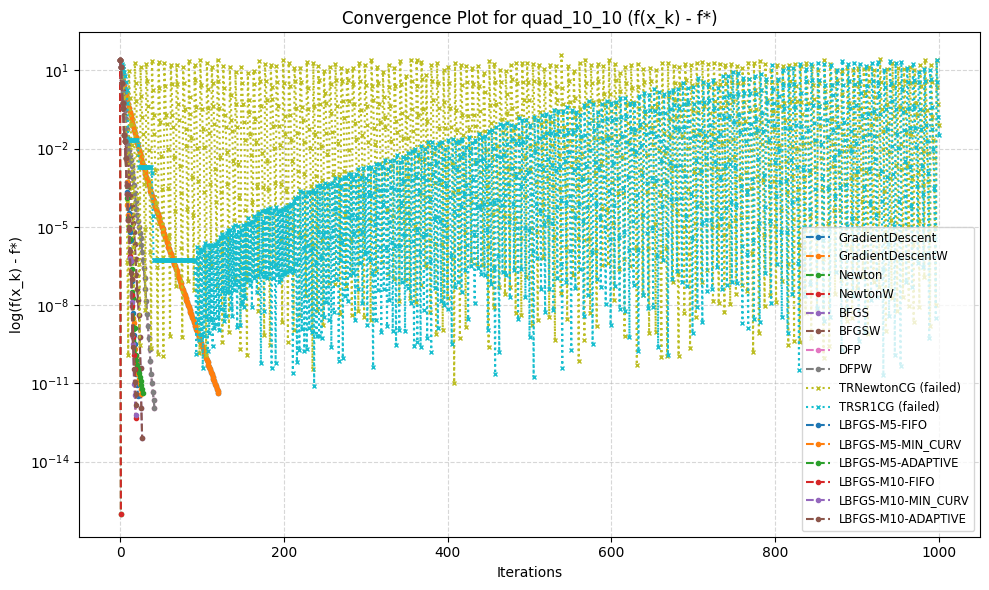

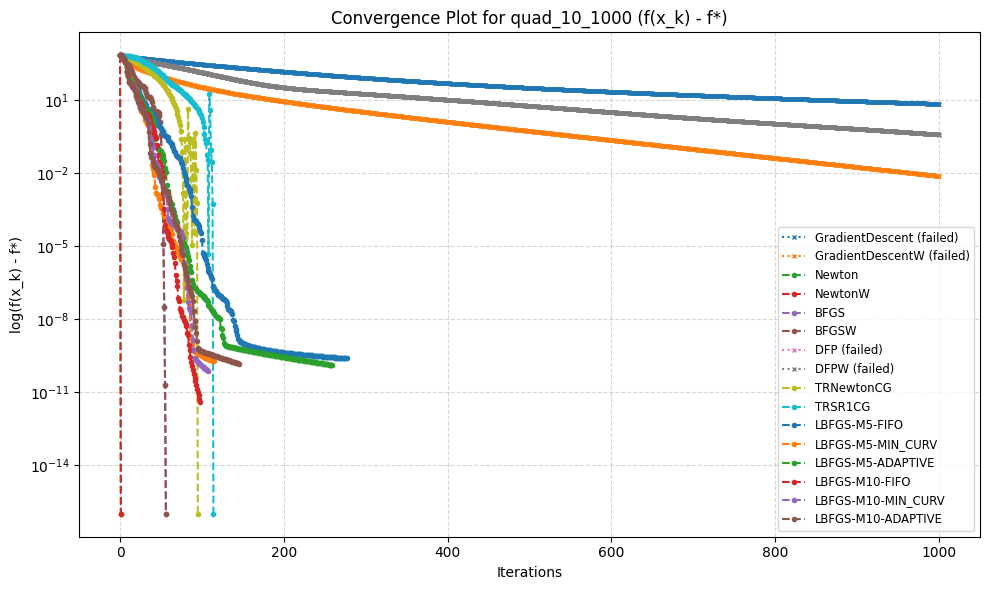

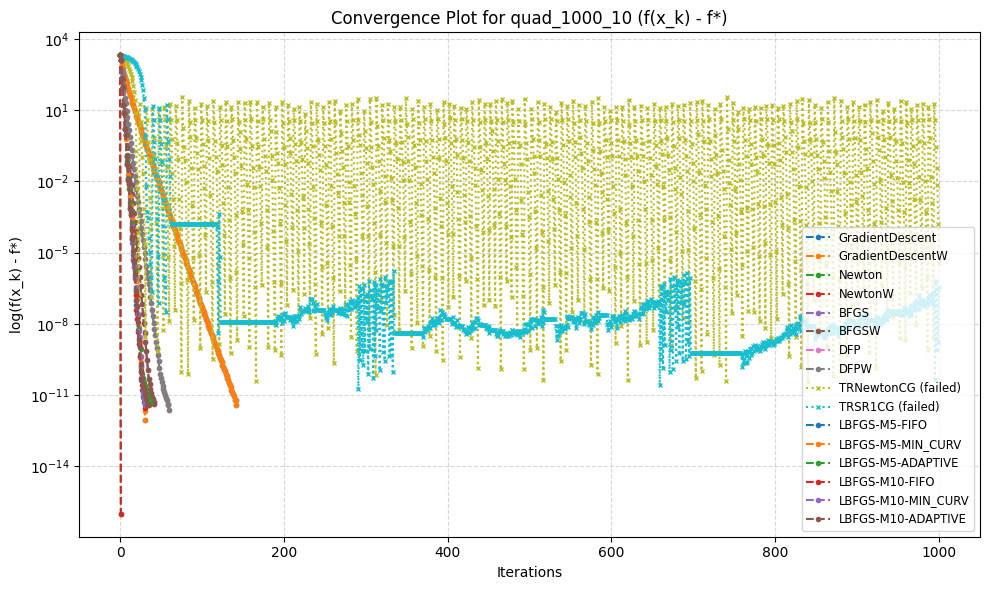

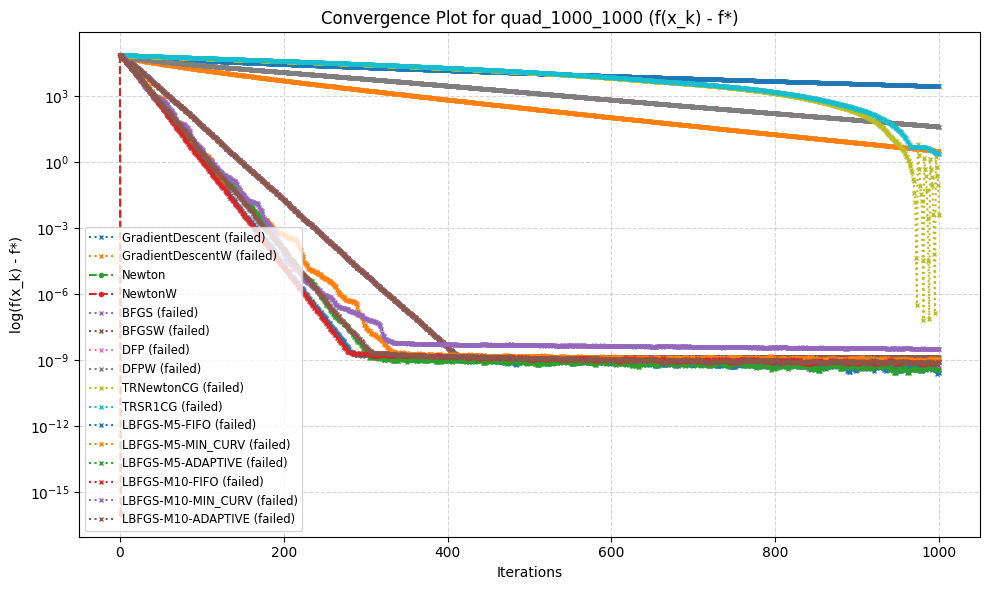

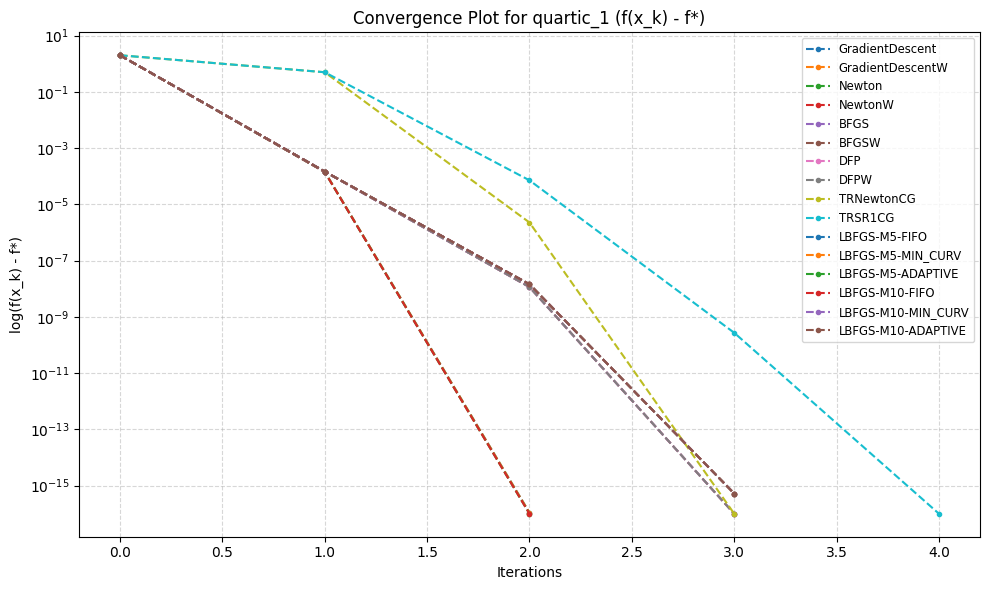

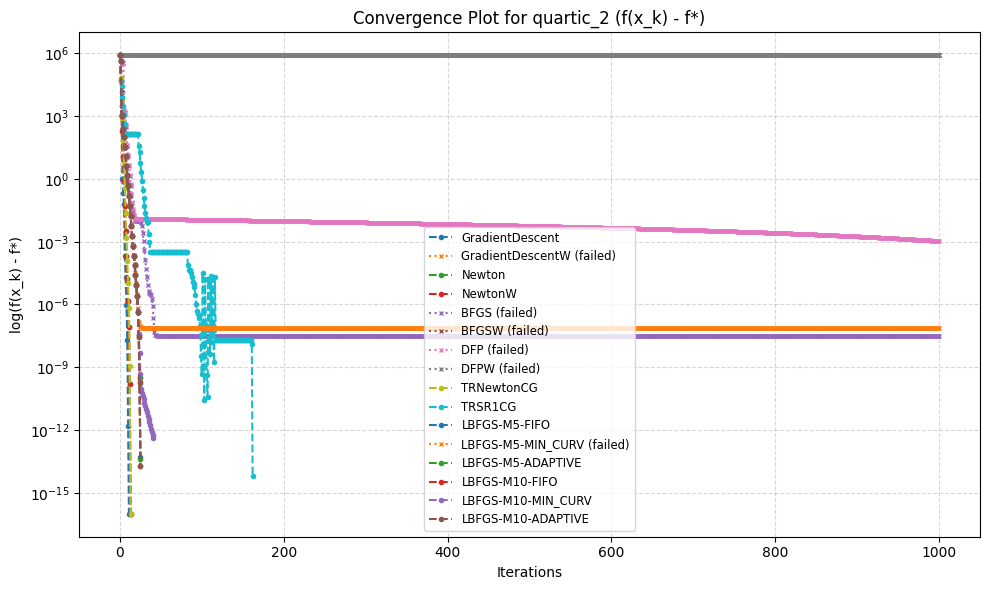

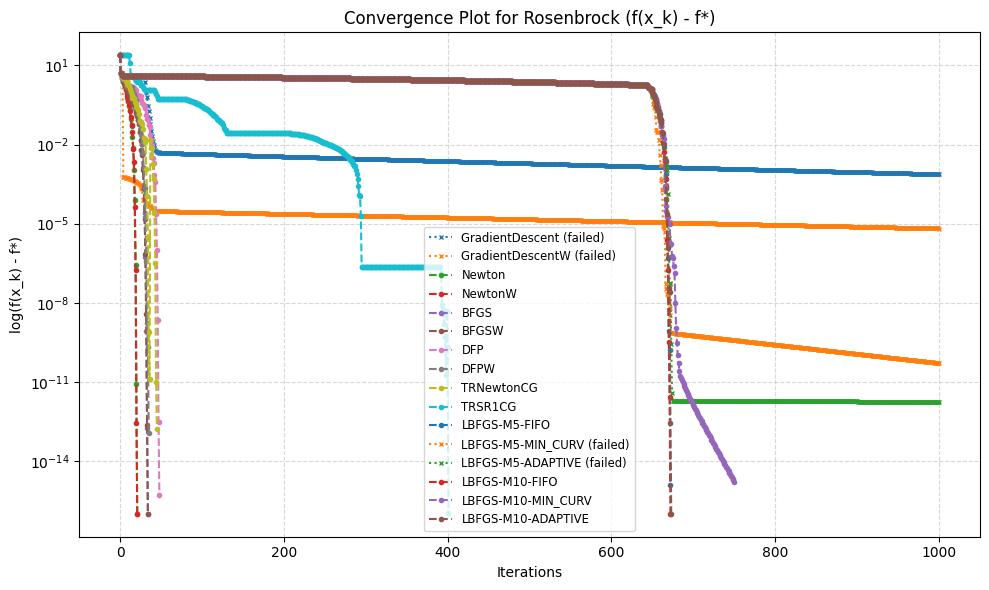

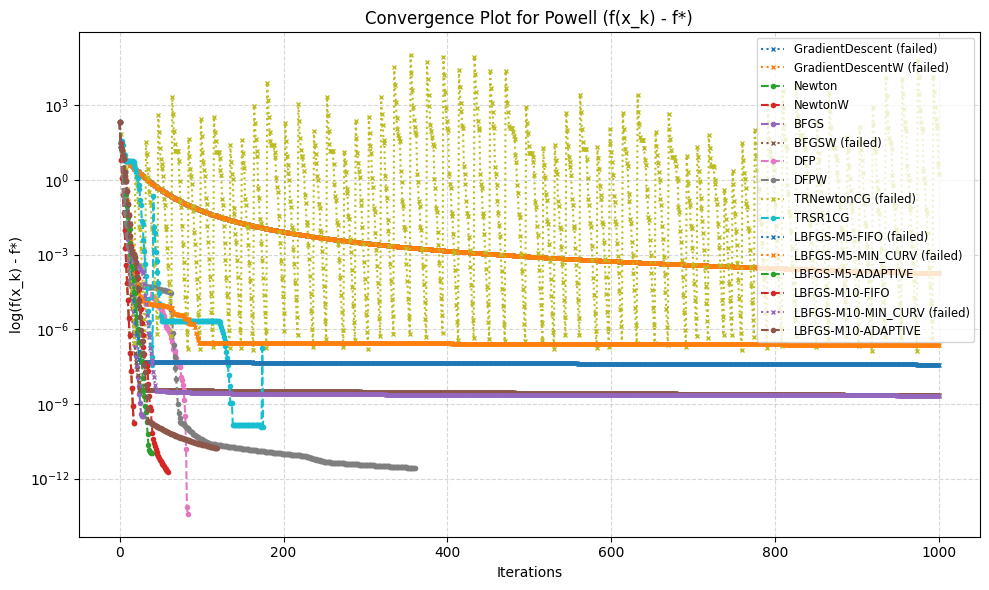

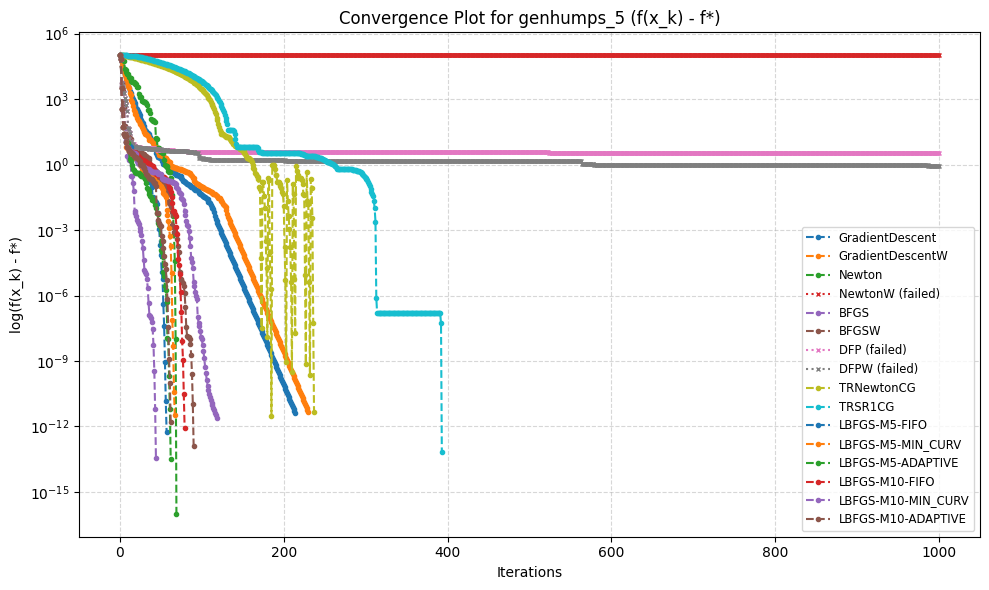

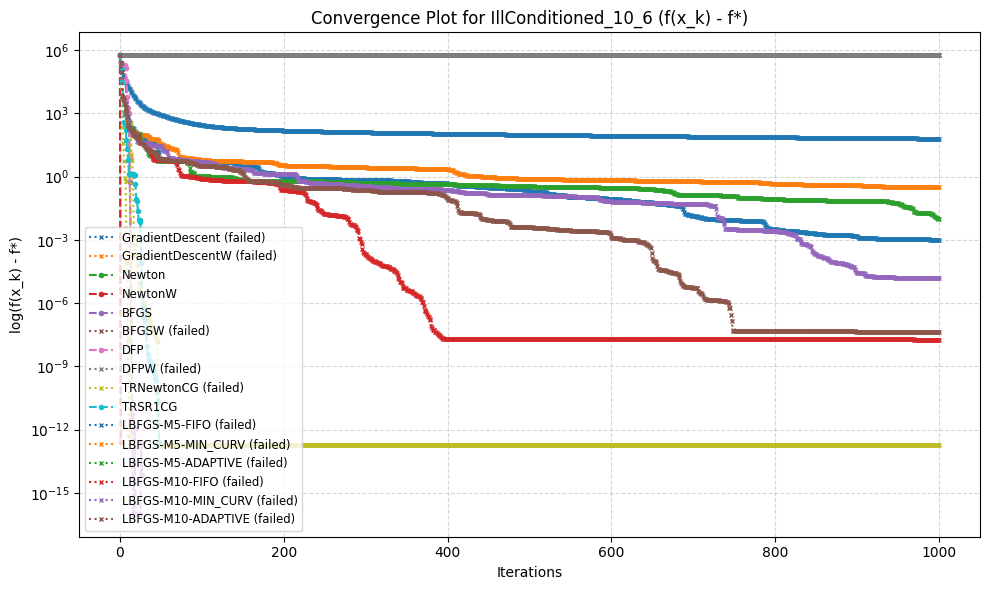

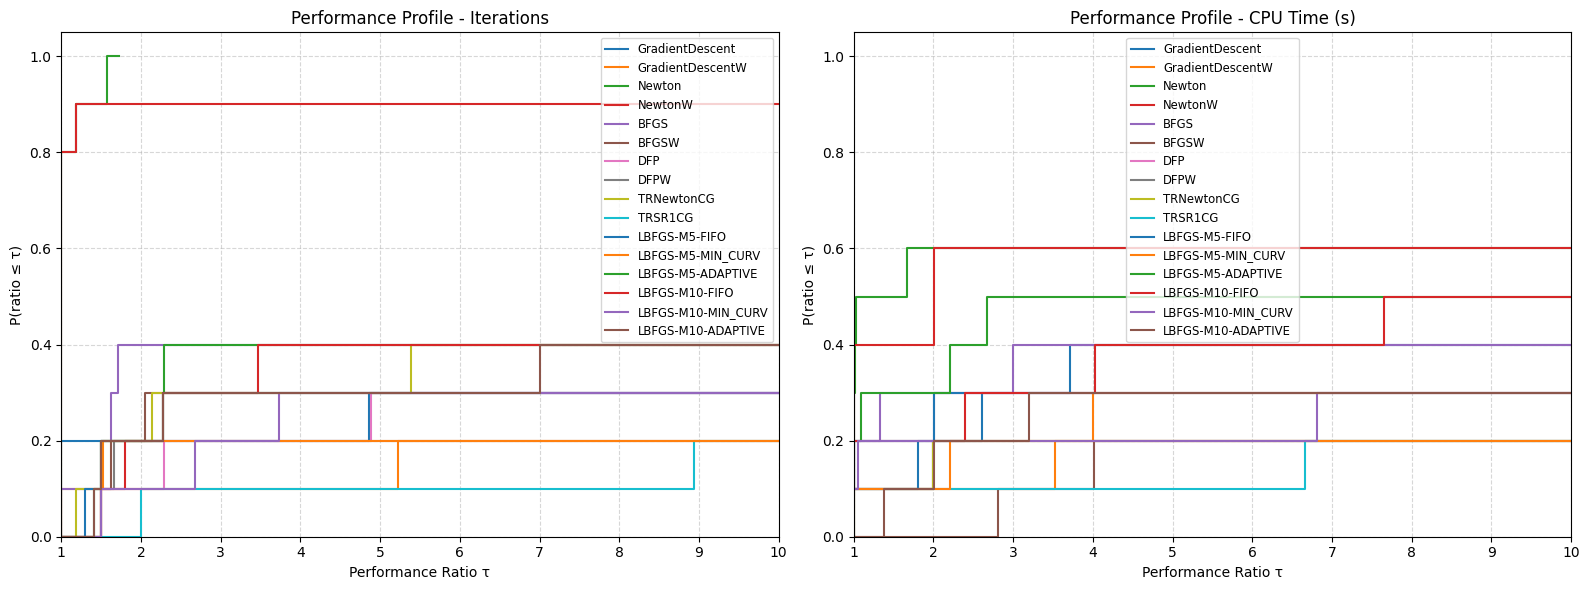

In [37]:
for problem_name in detailed_info:
    plt.figure(figsize=(10, 6))
    plt.title(f"Convergence Plot for {problem_name} (f(x_k) - f*)")
    
    problem_has_gap = False
    for method_name, info in detailed_info[problem_name].items():
        # Plot all methods regardless of success status
        if 'f_gaps' in info and info['f_gaps']:
            iterations = range(len(info['f_gaps']))
            # Add a small epsilon to avoid log(0) issues
            f_gaps_plot = np.maximum(np.array(info['f_gaps']), 1e-16) 
            
            # Different line style based on success status
            linestyle = '--' if info.get('success', False) else ':'
            marker = 'o' if info.get('success', False) else 'x'
            label = method_name if info.get('success', False) else f"{method_name} (failed)"
            
            plt.plot(iterations, f_gaps_plot, label=label, marker=marker, markersize=3, linestyle=linestyle)
            problem_has_gap = True
        elif 'f_values' in info and info['f_values']:
            # Plot f_values if f_gaps is not available
            print(f"Note: Plotting f(x_k) for {method_name} on {problem_name} as f* is unavailable.")
            iterations = range(len(info['f_values']))
            f_values_plot = np.array(info['f_values'])
            
            # Different line style based on success status
            linestyle = '--' if info.get('success', False) else ':'
            marker = 'o' if info.get('success', False) else 'x'
            label = f"{method_name} (f(x))" if info.get('success', False) else f"{method_name} (f(x), failed)"
            
            plt.plot(iterations, f_values_plot, label=label, marker=marker, markersize=3, linestyle=linestyle)
        
    if problem_has_gap:
        plt.yscale('log')
        plt.ylabel('log(f(x_k) - f*)')
    else:
         plt.ylabel('f(x_k)') # Label appropriately if plotting raw function values

        
    plt.xlabel('Iterations')
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.legend(fontsize='small')
    plt.tight_layout()
    plt.show()

# --- Performance Profiles --- [cite: 305]
# (Using a simplified version based on iterations and time)

def plot_performance_profile(metric_data, metric_name, ax):
    "Helper to plot a single performance profile."
    max_ratio = 0 # Track max ratio for plot limits
    num_problems = 0
    if metric_data:
        num_problems = len(next(iter(metric_data.values()))) # Get number of problems from first method

    for method, ratios in metric_data.items():
        valid_ratios = [r for r in ratios if np.isfinite(r)]
        if not valid_ratios: continue
        
        sorted_ratios = np.sort(valid_ratios)
        y = np.arange(1, len(sorted_ratios) + 1) / num_problems # Normalize by total problems
        
        # Extend the line for step plot visualization
        plot_x = np.concatenate(([1], sorted_ratios, [sorted_ratios[-1]*1.1])) # Start at 1, include points, extend slightly
        plot_y = np.concatenate(([0], y, [y[-1]])) # Step plot y-coordinates
        
        ax.step(plot_x, plot_y, where='post', label=method)
        max_ratio = max(max_ratio, sorted_ratios[-1] if sorted_ratios.size > 0 else 1)
        
    ax.set_title(f'Performance Profile - {metric_name}')
    ax.set_xlabel('Performance Ratio τ')
    ax.set_ylabel('P(ratio ≤ τ)')
    ax.grid(True, which="both", ls="--", alpha=0.5)
    ax.legend(fontsize='small')
    # Set x-limits dynamically, but with a reasonable upper bound
    ax.set_xlim(1, max(2, min(10, max_ratio * 1.1))) 
    ax.set_ylim(0, 1.05)

# --- Calculate Performance Ratios --- 
perf_ratios = {'Iterations': {}, 'CPU Time (s)': {}}
problems_list = list(results.keys())
methods_list = [m['name'] for m in method_specs]

for metric in perf_ratios.keys():
    min_perf = {}
    for prob_name in problems_list:
        min_val = float('inf')
        for meth_name in methods_list:
            # Check if results exist for this problem/method combo
            res = results.get(prob_name, {}).get(meth_name, {})
            val = res.get(metric, float('inf'))
            # Only consider successful runs for minimum performance
            if isinstance(val, (int, float)) and np.isfinite(val) and res.get('Success', False):
                min_val = min(min_val, val)
        min_perf[prob_name] = min_val if np.isfinite(min_val) else 1.0 # Avoid division by zero/inf
        if min_perf[prob_name] == 0 : min_perf[prob_name] = 1e-10 # Avoid division by exactly zero

    for meth_name in methods_list:
        ratios_list = []
        for prob_name in problems_list:
            res = results.get(prob_name, {}).get(meth_name, {})
            val = res.get(metric, float('inf'))
            
            # Include all methods in the plot, with different treatment based on success
            if isinstance(val, (int, float)) and np.isfinite(val):
                if res.get('Success', False):
                    ratio = val / min_perf[prob_name]
                    ratios_list.append(min(ratio, 20))  # Cap ratio at 20 for plotting
                else:
                    # For failed methods, assign a high but not maximum ratio
                    ratios_list.append(19)  # Just below the cap to distinguish from completely missing data
            else:
                ratios_list.append(20)  # Assign highest ratio for non-finite values
                
        perf_ratios[metric][meth_name] = ratios_list

# --- Plot Profiles --- 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

if perf_ratios['Iterations']:
    plot_performance_profile(perf_ratios['Iterations'], 'Iterations', axes[0])
else:
    axes[0].set_title('Performance Profile - Iterations (No Data)')

if perf_ratios['CPU Time (s)']:
    plot_performance_profile(perf_ratios['CPU Time (s)'], 'CPU Time (s)', axes[1])
else:
    axes[1].set_title('Performance Profile - CPU Time (s) (No Data)')

plt.tight_layout()
plt.show()